# Tensorflow DNN and CNN Practice with MNIST
## Number recognition

### raoyonghui0630@gmail.com

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

## A basic regression issue via DNN

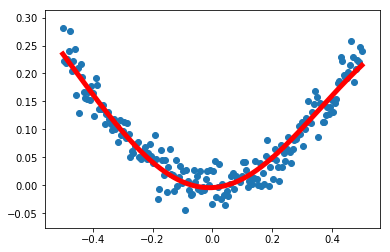

In [2]:
#DNN

x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0,0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32,[None, 1])
y = tf.placeholder(tf.float32,[None, 1])

Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1

L1 = tf.nn.tanh(Wx_plus_b_L1)
Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict = {x:x_data, y:y_data})
    prediction_value = sess.run(prediction, feed_dict = {x:x_data})
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value,'r-', lw=5)
    plt.show()


In [5]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Number Recognition - Basic DNN

In [6]:
# Basic DNN 
batch_size = 20
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,(None,784))
y = tf.placeholder(tf.float32,(None,10))

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W) + b)

loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict = {x:batch_xs, y:batch_ys})
        acc = sess.run(accuracy, feed_dict = {x:mnist.test.images, y:mnist.test.labels})
        print "Iter ", str(epoch), ", Testing Accuracy: ", str(acc)
            
            

Iter  0 , Testing Accuracy:  0.8923
Iter  1 , Testing Accuracy:  0.9054
Iter  2 , Testing Accuracy:  0.9094
Iter  3 , Testing Accuracy:  0.9139
Iter  4 , Testing Accuracy:  0.9167


## DNN with cross entropy

In [7]:
# DNN, cross entropy
batch_size = 20
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,(None,784))
y = tf.placeholder(tf.float32,(None,10))

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W) + b)

#loss = tf.reduce_mean(tf.square(y - prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits = prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict = {x:batch_xs, y:batch_ys})
        acc = sess.run(accuracy, feed_dict = {x:mnist.test.images, y:mnist.test.labels})
        print "Iter ", str(epoch), ", Testing Accuracy: ", str(acc)

Iter  0 , Testing Accuracy:  0.9079
Iter  1 , Testing Accuracy:  0.9149
Iter  2 , Testing Accuracy:  0.9172
Iter  3 , Testing Accuracy:  0.921
Iter  4 , Testing Accuracy:  0.9236


##  DNN with Dropout

In [10]:
# DNN, Drop out
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

x = tf.placeholder(tf.float32,(None,784))
y = tf.placeholder(tf.float32,(None,10))
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.truncated_normal([784, 200], stddev = 0.1))
b1 = tf.Variable(tf.zeros([200]) + 0.1)
L1 = tf.nn.tanh(tf.matmul(x, W1) + b1)

#keep_prob means keep_prob% of nodes works
L1_drop = tf.nn.dropout(L1, keep_prob)


W2 = tf.Variable(tf.truncated_normal([200, 200], stddev = 0.1))
b2 = tf.Variable(tf.zeros([200]) + 0.1)
L2 = tf.nn.tanh(tf.matmul(L1_drop, W2) + b2)

#keep_prob means keep_prob% of nodes works
L2_drop = tf.nn.dropout(L2, keep_prob)



W3 = tf.Variable(tf.truncated_normal([200, 100], stddev = 0.1))
b3 = tf.Variable(tf.zeros([100]) + 0.1)
L3 = tf.nn.tanh(tf.matmul(L2_drop, W3) + b3)

#keep_prob means keep_prob% of nodes works
L3_drop = tf.nn.dropout(L3, keep_prob)


W4 = tf.Variable(tf.truncated_normal([100, 10], stddev = 0.1))
b4 = tf.Variable(tf.zeros([10]) + 0.1)

#W = tf.Variable(tf.zeros([784,10]))
#b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(L3_drop,W4) + b4)

#loss = tf.reduce_mean(tf.square(y - prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits = prediction))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(10):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict = {x:batch_xs, y:batch_ys, keep_prob:0.5})  #1.0 means all nodes work, no dropout 
        test_acc = sess.run(accuracy, feed_dict = {x:mnist.test.images, y:mnist.test.labels, keep_prob:0.5})
        train_acc = sess.run(accuracy, feed_dict = {x:mnist.train.images, y:mnist.train.labels, keep_prob:0.5})
        print "Iter ", str(epoch), ", Testing Accuracy: ", str(test_acc), ", Train Accuracy: ", str(train_acc)

Iter  0 , Testing Accuracy:  0.8175 , Train Accuracy:  0.812818
Iter  1 , Testing Accuracy:  0.8611 , Train Accuracy:  0.851818
Iter  2 , Testing Accuracy:  0.8749 , Train Accuracy:  0.868545
Iter  3 , Testing Accuracy:  0.8817 , Train Accuracy:  0.876582
Iter  4 , Testing Accuracy:  0.8918 , Train Accuracy:  0.888636
Iter  5 , Testing Accuracy:  0.8918 , Train Accuracy:  0.888018
Iter  6 , Testing Accuracy:  0.8961 , Train Accuracy:  0.895982
Iter  7 , Testing Accuracy:  0.902 , Train Accuracy:  0.897582
Iter  8 , Testing Accuracy:  0.9012 , Train Accuracy:  0.900127
Iter  9 , Testing Accuracy:  0.9092 , Train Accuracy:  0.904364


## Basic CNN

In [ ]:
# CNN
testX = mnist.train.images[0:100]
testY = mnist.train.labels[0:100]

x = tf.placeholder(tf.float32,(None,784))
y = tf.placeholder(tf.float32,(None,10))

keep_prob = tf.placeholder(tf.float32)

batch_size = 100
n_batch = mnist.train.num_examples // batch_size

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)
    
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1],padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")


x_image = tf.reshape(x,[-1, 28,28,1])

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])
h_conv1= tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2  = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


# the first full connection layer, with relu activation
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


# the second full connection layer, with relu activation
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

prediction = tf.nn.softmax(tf.matmul(h_fc1,W_fc2) + b_fc2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))

train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1)) 

accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(5):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict ={x:batch_xs, y:batch_ys, keep_prob:0.7})
        acc = sess.run(accuracy, feed_dict = {x:testX, y:testY, keep_prob:0.7})
        print "Iter ", str(epoch), ", Testing Accuracy: ", str(acc)

